 ## INTRODUCTION TO PANDAS
* Library for computation with tabular data
* Mixed types of data allowed in a single table
* Columns and rows of data can be named
* Advanced data aggregation and statistical functions



 ## Basic data structures
    VECTOR            -   Series
(1 Dimensions)      

    Array             -   DataFrame
(2 Dimensions)    

## Pandas series creation and indexing


In [6]:
import pandas as pd
step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')
print(step_counts)

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


####  Add a date range to the Series

In [7]:
step_counts.index = pd.date_range('20180702',periods=6)
print(step_counts)

2018-07-02    3620
2018-07-03    7891
2018-07-04    9761
2018-07-05    3907
2018-07-06    4338
2018-07-07    5373
Freq: D, Name: steps, dtype: int64


#### Select data by the index values

In [8]:
print(step_counts['2018-07-03']) # Just like a dictionary

print(step_counts[3])  # Or by index position—like an array

print(step_counts['2018-07']) # Select all of july

7891
3907
2018-07-02    3620
2018-07-03    7891
2018-07-04    9761
2018-07-05    3907
2018-07-06    4338
2018-07-07    5373
Freq: D, Name: steps, dtype: int64


In [9]:
print(step_counts.dtypes) # View the data type

int64


In [10]:
import numpy as np

step_counts = step_counts.astype(np.float) # Convert to a float

print(step_counts.dtypes)    # View the data type

float64


In [11]:
# Create invalid data
step_counts[1:3] = np.NaN
# Now fill it in with zeros
step_counts = step_counts.fillna(0.)
# equivalently,
# step_counts.fillna(0., inplace=True)
print(step_counts[1:3])

2018-07-03    0.0
2018-07-04    0.0
Freq: D, Name: steps, dtype: float64


# Pandas DataFrame Creation and Methods

In [12]:
# Cycling distance
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]

# Create a tuple of data
joined_data = list(zip(step_data,cycling_data))

# The dataframe
activity_df = pd.DataFrame(joined_data)

print(activity_df)

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [13]:
# Add column names to dataframe
activity_df = pd.DataFrame(joined_data,index=pd.date_range('20150329',periods=6)
                           ,columns=['Walking','Cycling'])
print(activity_df)

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


In [14]:
# Select row of data by index name
print(activity_df.loc['2015-04-01'])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [15]:
# Select row of data by integer position
print(activity_df.iloc[-3])

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [16]:
# Name of column
print(activity_df['Walking'])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [17]:
# Object-oriented approach
print(activity_df.Walking)

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [18]:
# First column
print(activity_df.iloc[:,0])

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [19]:
# The location of the data file
filepath = 'Iris_Data.csv'
# Import the data
data = pd.read_csv(filepath)
# Print a few rows
print(data.iloc[:5])

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [20]:
# Create a new column that is a product
# of both measurements
data['sepal_area'] = data.sepal_length *data.sepal_width

# Print a few rows and columns
print(data.iloc[:5, -3:])
print (data.iloc[2:5,2:3])


   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00
   petal_length
2           1.3
3           1.5
4           1.4


In [21]:
# The lambda function applies what
# follows it to each row of data
data['abbrev'] = (data.species.apply(lambda x: x.replace('Iris-','')))
# Note that there are other ways to
# accomplish the above
print(data.iloc[:5, -3:])

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [22]:
# Concatenate the first two and
# last two rows
small_data = pd.concat([data.iloc[:2],data.iloc[-2:]])

print(small_data.iloc[:,-3:])
# See the 'join' method for
# SQL style joining of dataframes

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


In [23]:
# Use the size method with a
# DataFrame to get count
# For a Series, use the .value_counts
# method
group_sizes = (data.groupby('species').size())
print(group_sizes)

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [24]:
# Mean calculated on a DataFrame
print(data.mean())

# Median calculated on a Series
print(data.petal_length.median())

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64
4.35


In [25]:
# Standard dev, variance, and SEM
print(data.petal_length.std() , data.petal_length.var() , data.petal_length.sem())

(1.7644204199522626, 3.113179418344519, 0.1440643240210085)


In [26]:
# As well as quantiles
print(data.quantile(0))


sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [27]:
print(data.describe())

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [28]:
# Sample 5 rows without replacement
sample = (data.sample(n=5,replace=False,random_state=42))
print(sample.iloc[:,-3:])

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


In [29]:
import seaborn as sns
sns.jointplot(x='sepal_length',y='sepal_width',data=data, size=4)

c:\python27\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


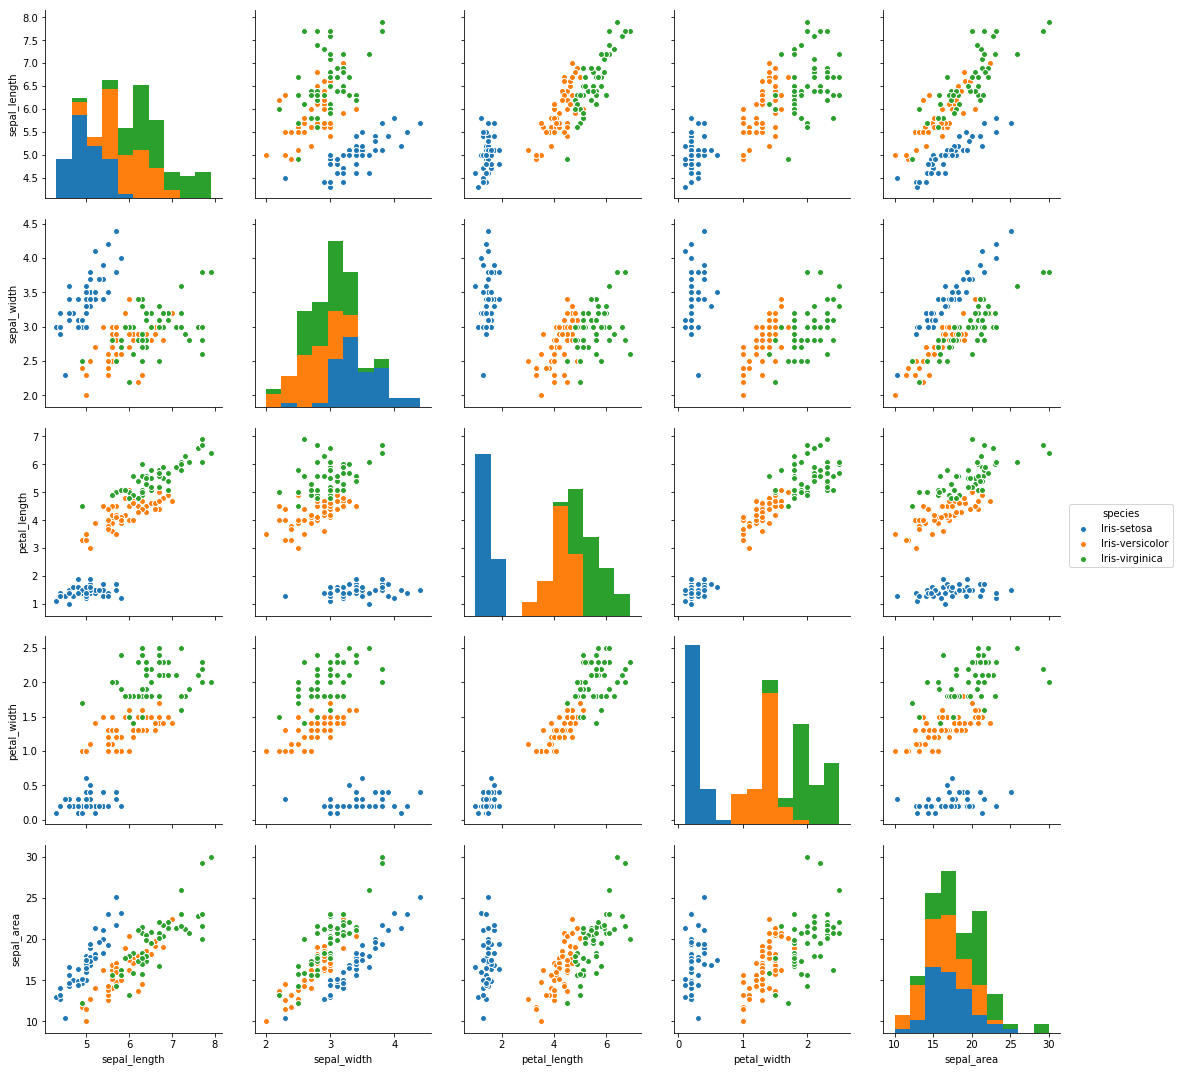

In [30]:
sns.pairplot(data, hue='species',size=3)